In [3]:
#Import the required Libraries.
import numpy as np
import pandas as pd
from pandas_ui import *
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format

## Data Cleaning 

### Data Reading & Data Types 

In [4]:
#Read the data in pandas
inp0= pd.read_csv("Dress.csv")
inp1= pd.read_csv("Dress+Sales.csv")

You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.
- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.
- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


Which of the following column do you think are of no use in “Attribute DataSet”.
- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


In [5]:
# Print the information about the attributes of inp0 and inp1.
print(inp0.info())
print()
print(inp1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
--- 

### Fixing the Rows and Columns 

As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [6]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.
inp0.Size.replace({'M':'Medium', 'L':'Large', 'XL':'Extra Large', 'free':'Free', 'S':'Small', 's':'Small', 'small':'Small'}, inplace=True)

In [7]:
# Print the value counts of each category in "Size" column.
round(inp0.Size.value_counts(normalize=True)*100,1)

Medium        35.70000
Free          34.40000
Large         19.40000
Small          7.50000
Extra Large    2.90000
Name: Size, dtype: float64

### Impute/Remove Missing values

In [8]:
# Print the null count of each variables of inp0 and inp1.
print(inp0.isna().sum())
print()
print(inp1.isna().sum())

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
dtype: int64

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      0
14-09-2013      0
16-09-2013      0
18-09-2013      0
20-09-2013      0
22-09-2013      0
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64


You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.







In [9]:
# Print the data types information of inp1 i.e. "Dress Sales" data.

inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

There might be some string values in the dataset with type objects, as those strings arent useful we might convert the dataset into float type replacing these strings values with NaN

Using function -

inp1[cols] = inp1[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

Please find the reference of this function at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

In [10]:
# Do the required changes in the "Dress Sales" data set to make it ready for conversion into float type.
inp1.isna().sum()

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      0
14-09-2013      0
16-09-2013      0
18-09-2013      0
20-09-2013      0
22-09-2013      0
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64

In [11]:
# Convert the object type columns in "Dress Sales" into float type of data type.
for i in inp1.columns.to_list():
    if inp1[i].dtype.str == '|O':
        inp1[i] = inp1[i].apply(pd.to_numeric, downcast='float', errors='coerce')

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.

In [12]:
# Print the null percetange of each column of inp1.
inp1.isna().mean().sort_values(ascending = False)*100

10-02-2013   54.07098
10-04-2013   53.86221
30-09-2013   53.65344
10-08-2013   53.23591
10-10-2013   53.23591
26-09-2013   46.34656
20-09-2013    0.20877
09-12-2013    0.20877
14-09-2013    0.20877
16-09-2013    0.20877
18-09-2013    0.20877
22-09-2013    0.20877
09-02-2013    0.00000
09-06-2013    0.00000
31-08-2013    0.00000
29-08-2013    0.00000
09-04-2013    0.00000
10-12-2013    0.00000
09-08-2013    0.00000
09-10-2013    0.00000
24-09-2013    0.00000
28-09-2013    0.00000
10-06-2013    0.00000
Dress_ID      0.00000
dtype: float64

In [13]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
inp1.drop(inp1.columns[inp1.isna().mean()>=.4], axis=1, inplace=True)
inp1.isna().mean().sort_values(ascending = False)*100

09-12-2013   0.20877
22-09-2013   0.20877
20-09-2013   0.20877
18-09-2013   0.20877
16-09-2013   0.20877
14-09-2013   0.20877
09-06-2013   0.00000
29-08-2013   0.00000
31-08-2013   0.00000
09-02-2013   0.00000
09-04-2013   0.00000
10-12-2013   0.00000
09-08-2013   0.00000
09-10-2013   0.00000
10-06-2013   0.00000
24-09-2013   0.00000
28-09-2013   0.00000
Dress_ID     0.00000
dtype: float64

In [14]:
#inp1.to_csv('Data_11.csv')

In [15]:
#inp1.columns[inp1.columns.to_series().str.contains("-")].to_list()

You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.




In [16]:
#list(filter(lambda x : x.split('-')[1] in ['03','04','05'], inp1.columns[inp1.columns.to_series().str.contains("-").to_list()]))

In [17]:
for i in (list(filter(lambda x : x.split('-')[1] in ['06','07','08'], inp1.columns[inp1.columns.to_series().str.contains("-").to_list()]))):
    inp1.rename(columns={i:'Summer'}, inplace= True)

In [18]:
for i in (list(filter(lambda x : x.split('-')[1] in ['09','10','11'], inp1.columns[inp1.columns.to_series().str.contains("-").to_list()]))):
    inp1.rename(columns={i:'Autumn'}, inplace= True)

In [19]:
for i in (list(filter(lambda x : x.split('-')[1] in ['12','01','02'], inp1.columns[inp1.columns.to_series().str.contains("-").to_list()]))):
    inp1.rename(columns={i:'Winter'}, inplace= True)

In [20]:
for i in (list(filter(lambda x : x.split('-')[1]in ['03','04','05'], inp1.columns[inp1.columns.to_series().str.contains("-").to_list()]))):
    inp1.rename(columns={i:'Spring'}, inplace= True)

In [21]:
inp1.head()

,Dress_ID,Summer,Summer,Winter,Spring,Summer,Summer,Autumn,Winter,Autumn,Autumn,Autumn,Autumn,Autumn,Autumn,Autumn,Summer,Winter
0,1006032852.00000,2114,2274,2491,2660,2727,2887,2930,3119.00000,3204.00000,3277.00000,3321.00000,3386.00000,3479.00000,3554,3706,3897,4048
1,1212192089.00000,151,275,570,750,813,1066,1164,1558.00000,1756.00000,1878.00000,1985.00000,2106.00000,2454.00000,2710,3258,3911,4277
2,1190380701.00000,6,7,7,7,8,8,9,10.00000,10.00000,10.00000,10.00000,10.00000,11.00000,11,11,11,11
3,966005983.00000,1005,1128,1326,1455,1507,1621,1637,1723.00000,1746.00000,1783.00000,1796.00000,1812.00000,1845.00000,1878,1914,1952,1963
4,876339541.00000,996,1175,1304,1396,1432,1559,1570,1638.00000,1655.00000,1681.00000,1743.00000,1824.00000,1919.00000,2032,2252,2544,2736


In [22]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".
inp1 = inp1.groupby(level=0, axis=1).sum()
inp1.to_excel('Data1.xlsx')
inp1

,Autumn,Dress_ID,Spring,Summer,Winter
0,26857.00000,1006032852.00000,2660.00000,13899.00000,9658.00000
1,17311.00000,1212192089.00000,750.00000,6216.00000,6405.00000
2,82.00000,1190380701.00000,7.00000,40.00000,28.00000
3,14411.00000,966005983.00000,1455.00000,7213.00000,5012.00000
4,14676.00000,876339541.00000,1396.00000,7706.00000,5678.00000
...,...,...,...,...,...
474,565.00000,990559192.00000,60.00000,203.00000,144.00000
475,3800.00000,713391965.00000,560.00000,1478.00000,810.00000
476,5290.00000,532874347.00000,734.00000,2005.00000,1214.00000
477,2117.00000,655464934.00000,254.00000,769.00000,516.00000


In [23]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 0 to 478
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Autumn    479 non-null    float64
 1   Dress_ID  479 non-null    float64
 2   Spring    479 non-null    float64
 3   Summer    479 non-null    float64
 4   Winter    479 non-null    float64
dtypes: float64(5)
memory usage: 22.5 KB


In [24]:
from functools import reduce
x =[]
y =[]
for i in inp1.columns[~inp1.columns.to_series().str.contains('_')].to_list():
        y.append(i)
        x.append(reduce(lambda a,b : a+b, inp1[i]))
    
print(y)
print(x)

['Autumn', 'Spring', 'Summer', 'Winter']
[1363288.0, 143600.0, 691907.0, 474683.0]


Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [25]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
inp = pd.merge(left=inp0,right=inp1, how='left', left_on='Dress_ID', right_on='Dress_ID')
inp.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Autumn,Spring,Summer,Winter
0,1006032852,Sexy,Low,4.60000,Medium,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1,26857.00000,2660.00000,13899.00000,9658.00000
1,1212192089,Casual,Low,0.00000,Large,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0,17311.00000,750.00000,6216.00000,6405.00000
2,1190380701,vintage,High,0.00000,Large,Automn,o-neck,full,polyster,NaN,NaN,print,0,82.00000,7.00000,40.00000,28.00000
3,966005983,Brief,Average,4.60000,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1,14411.00000,1455.00000,7213.00000,5012.00000
4,876339541,cute,Low,4.50000,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,14676.00000,1396.00000,7706.00000,5678.00000


In [26]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.
inp1.drop(inp1.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)
inp1.isnull().sum()

Autumn      0
Dress_ID    0
Spring      0
Summer      0
Winter      0
dtype: int64

In [27]:
inp

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Autumn,Spring,Summer,Winter
0,1006032852,Sexy,Low,4.60000,Medium,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1,26857.00000,2660.00000,13899.00000,9658.00000
1,1212192089,Casual,Low,0.00000,Large,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0,17311.00000,750.00000,6216.00000,6405.00000
2,1190380701,vintage,High,0.00000,Large,Automn,o-neck,full,polyster,NaN,NaN,print,0,82.00000,7.00000,40.00000,28.00000
3,966005983,Brief,Average,4.60000,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1,14411.00000,1455.00000,7213.00000,5012.00000
4,876339541,cute,Low,4.50000,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,14676.00000,1396.00000,7706.00000,5678.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,990559192,Brief,Average,4.70000,Medium,winter,o-neck,halfsleeve,acrylic,chiffon,NaN,striped,0,565.00000,60.00000,203.00000,144.00000
475,713391965,Casual,Low,4.70000,Medium,Spring,o-neck,full,polyster,NaN,NaN,solid,1,3800.00000,560.00000,1478.00000,810.00000
476,532874347,Casual,Average,4.70000,Medium,Summer,v-neck,full,cotton,NaN,lace,solid,1,5290.00000,734.00000,2005.00000,1214.00000
477,655464934,Casual,Average,4.60000,Large,winter,boat-neck,sleevless,silk,broadcloth,applique,print,1,2117.00000,254.00000,769.00000,516.00000


Print the null count of inp0 to get the idea about the missing values in data set.

In [28]:
# Print the null count of each columns in inp0 dataframe i.e. combined data frame of inp0 and inp1 without date columns.

inp.to_csv('new_data_set.csv')
inp.isna().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Autumn              0
Spring              0
Summer              0
Winter              0
dtype: int64

You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



In [29]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
for i in ['Price', 'Season', 'NeckLine', 'SleeveLength']:
    inp = inp[~inp[i].isnull()]

In [30]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
for i in ['Material', 'FabricType', 'Decoration', 'Pattern Type']:
    inp[i] = inp[i].replace(np.nan, 'Missing')

### Standardise value 

In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.
 
- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [31]:
#correcting the spellings.

inp.Season= inp0.Season.replace('Automn', "Autumn")
inp.Season= inp0.Season.replace('spring', "Spring")
inp.Season= inp0.Season.replace('winter', "Winter")

In [32]:
#correcting the Spellings.

inp.SleeveLength= inp0.SleeveLength.replace(['cap-sleeves', 'capsleeves'], "cap sleeves")
inp.SleeveLength= inp0.SleeveLength.replace('full', "full sleeves")
inp.SleeveLength= inp0.SleeveLength.replace(['half','halfsleeve'], "half sleeves")
inp.SleeveLength= inp0.SleeveLength.replace(['sleevless', 'sleeevless', 'sleeveless', 'sleveless'], "sleeve less")
inp.SleeveLength= inp0.SleeveLength.replace(['threequarter','threequater', 'thressqatar'], "three quater")
inp.SleeveLength= inp0.SleeveLength.replace(['turndowncollor','urndowncollor'], "turn down collar")

## Univariate Analysis - Session 3 Graded Questions

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.
- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


In [33]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
grp = inp.groupby('Style').sum()
grp['total_sales'] = grp.apply(lambda x : x.Autumn+x.Summer+x.Winter+x.Spring, axis =1)
grp['total_sales'].sort_values(ascending = False)
inp.replace(grp[grp.total_sales < 50000].index, 'Others', inplace=True)

In [34]:
inp.Style.value_counts(normalize=True)*100

Casual     45.97458
Sexy       13.77119
party      10.16949
cute        9.11017
vintage     5.29661
bohemian    4.87288
Brief       3.60169
work        3.60169
Others      2.11864
sexy        1.48305
Name: Style, dtype: float64

What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


In [35]:
# Calculate the percentage of each categories in the "Style" variable.
inp.Style.value_counts(normalize=True)*100

Casual     45.97458
Sexy       13.77119
party      10.16949
cute        9.11017
vintage     5.29661
bohemian    4.87288
Brief       3.60169
work        3.60169
Others      2.11864
sexy        1.48305
Name: Style, dtype: float64

### Caregorical Ordered Univariate Analysis

Which of the following is an unordered variable in “Attribute DataSet”.
- Style
- Price
- Season
- Size


### Numerical variable Univariate analysis:

What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.
- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000



In [36]:
# Describe the numerical variale: "Autumn".
inp1.Autumn.describe([.25,.5,.75,.9,1])

count     479.00000
mean     2846.11273
std      5004.98587
min         1.00000
25%       410.50000
50%      1334.00000
75%      3126.00000
90%      6342.80000
100%    55532.00000
max     55532.00000
Name: Autumn, dtype: float64

In [37]:
inp1.Autumn.quantile([1]).values - inp1.Autumn.quantile([.75]).values

array([52406.])

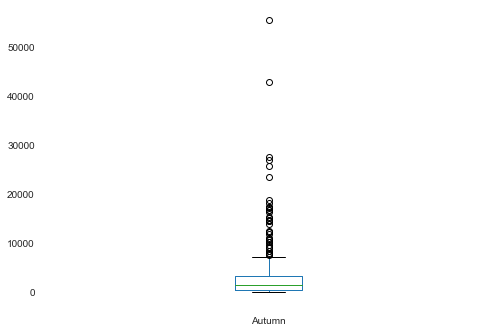

In [38]:
# plot the boxplot of "Autumn" column.
inp1.Autumn.plot(kind ='box')
plt.show()

Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter
- Summer
- Spring
- Autumn


In [39]:
# Find the maximum and 99th percentile of all seasons.
max_99=[]
for i in ['Winter', 'Summer', 'Spring', 'Autumn']:
       max_99.append(inp1[i].quantile([.99,1]).round(2).to_list())
for j,k in zip(max_99,['Winter', 'Summer', 'Spring', 'Autumn']):
    print('For season',k,'99th percentile -',j[0],'/','maximum percentile -', j[1])

For season Winter 99th percentile - 8908.42 / maximum percentile - 20388.0
For season Summer 99th percentile - 13954.0 / maximum percentile - 35577.0
For season Spring 99th percentile - 2656.88 / maximum percentile - 7374.0
For season Autumn 99th percentile - 23960.4 / maximum percentile - 55532.0


In [40]:
max_99=[]
for i in ['Winter', 'Summer', 'Spring', 'Autumn']:
       max_99.append(inp1[i].quantile([.99,1]).round(2).to_list())
for j,k in zip(max_99,['Winter', 'Summer', 'Spring', 'Autumn']):
    print('For season',k,'difference of Max and 99th percentile -',(j[1]-j[0]))

For season Winter difference of Max and 99th percentile - 11479.58
For season Summer difference of Max and 99th percentile - 21623.0
For season Spring difference of Max and 99th percentile - 4717.12
For season Autumn difference of Max and 99th percentile - 31571.6


## Bivariate Analysis Session 4 Graded Questions

### Numerical- Categorical analysis

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High


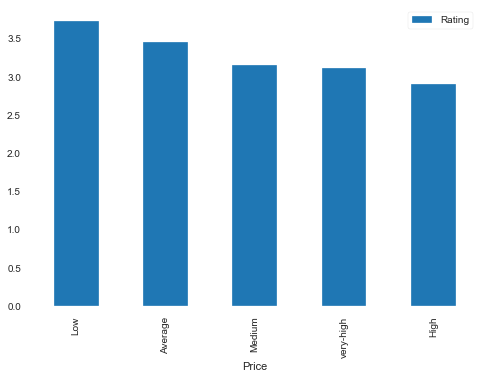

In [43]:
# Find the Mean of Ratings for each Price category.
inp.groupby(inp.Price).agg({'Rating':'mean'}).sort_values(by = 'Rating', ascending=False).round(2).plot.bar()
plt.show()

What is the median of the rating of “vintage” category in Style column?
- 4.6
- 4.7
- 4.55
- 0.00


In [46]:
# Find the median of Ratings for each Style category.
inp.groupby(inp.Style).agg({'Rating':'median'}).sort_values(by = 'Rating', ascending=False).round(2).loc['vintage'].values

array([4.6])

Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter


In [47]:
# Summer sale vs Recommendation.
p=[]
n=[]
for i in ['Summer', 'Spring', 'Autumn', 'Winter']:
    n.append(i)
    p.append(inp[i][inp.Recommendation ==1].mean().round(2))
for x,y in zip(n,p):
    print(f"Average sale for season {x} is {y}")

Average sale for season Summer is 1486.3
Average sale for season Spring is 306.85
Average sale for season Autumn is 2891.4
Average sale for season Winter is 1011.7


### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


In [98]:
# Size vs Recommendation.
inp.groupby(inp.Size).agg({'Recommendation':'sum'}).sort_values(by = 'Recommendation', ascending = False)

,Recommendation
Size,
Medium,76
Free,74
Large,33
Small,13
Extra Large,4


### Multivariate analysis 

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute       -     True
- Price: very high and style: party
- Price: low and style: sexy


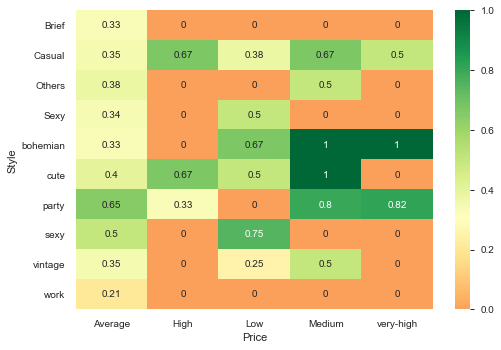

In [59]:
# plot the heat map of Style, price and Recommendation.
heat = inp.pivot_table(index='Style', columns='Price', values='Recommendation', aggfunc={'Recommendation':'mean'},fill_value= 0).round(2)
sns.heatmap(data=heat,cmap = 'RdYlGn', annot=True, fmt='.2g',center=0.307)
plt.show()

Which of the following 'Style' type has the highest recommendation in the 'Average' price segment?
- Work
- Vintage
- Casual
- Party --- True


In [65]:
# plot the heat map of Style, price and Recommendation.
inp[inp.Price=='Average'].groupby('Style').agg({'Recommendation':'mean'}).sort_values(by = 'Recommendation', ascending= False)

,Recommendation
Style,
party,0.64706
sexy,0.50000
cute,0.40000
Others,0.37500
vintage,0.35294
Casual,0.34545
Sexy,0.34483
Brief,0.33333
bohemian,0.33333
